In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
rs = 18.6  # Scale radius in kpc
rho0 = 0.383  # Local DM density in GeV/cm^3
r0 = 8.2  # Sun position in kpc
m_chi = 10**3
t = 3.15 * 10**17 # in s

sigma_v = np.logspace(-33,-18,100)


rho_sat = m_chi/(sigma_v*t)



# Function to calculate the NFW halo density profile
def nfw_halo(r, rs):
    x = r / rs
    return rhos / (x * (1 + x)**2)

# Function to calculate the DM mass density of the Milky Way
def mw_density_GS(r, Rs, Rsat, Rsp,gamma_sp):
    density = np.zeros_like(r)

    # Condition 1: r < 2RS
    mask_condition_1 = r < 2 * Rs
    density[mask_condition_1] = 0

    # Condition 2: 2RS ≤ r < Rsat
    mask_condition_2 = (r >= 2 * Rs) & (r < Rsat)
    density[mask_condition_2] = rho_sat * (r[mask_condition_2] / Rsat)**(-0.5)

    # Condition 3: Rsat ≤ r < Rsp
    mask_condition_3 = (r >= Rsat) & (r < Rsp)
    x = r[mask_condition_3]/ Rsp
    density[mask_condition_3] = nfw_halo(Rsp, rs)*x**(-gamma_sp)

    # Condition 4: r ≥ Rsp
    mask_condition_4 = r >= Rsp
    density[mask_condition_4] = nfw_halo(r[mask_condition_4], rs)

    return density

# Generate radii from 0.01 to 100 times the scale radius
r = np.logspace(-9, 0, 100)
rhos = (rho0 * ((r0 / rs) * (1 + r0 / rs)**(2)))
# Parameters for the Milky Way density profile
Rs = 3.8*10**(-11)  # Example value for Rs# Example value for Rsat
Rsp = 0.34*10**(-3)  # Example value for Rsp
 # Example value for rhosat
gamma_sp=2.35
Rsat = (((rhos/rho_sat)*(rs/Rsp)*((1+(Rsp/rs))**(-2)))**(1/gamma_sp))*Rsp

# Calculate the density profile for the Milky Way
density_mw_GS = mw_density_GS(r, Rs, Rsat, Rsp,gamma_sp)

# Plot the Milky Way density profile
plt.plot(r, density_mw_GS,label='GS', color='b')
plt.xlabel('Radius (r in kpc)')

plt.ylabel('Density (rho in GeV/cm^3)')
plt.title('Milky Way DM Density Profile')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.xlim([10**(-9), 1])  # Set the desired x-axis limits
plt.show()


ValueError: operands could not be broadcast together with shapes (0,) (100,) 

In [1]:
import numpy as np
from scipy.integrate import dblquad


c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


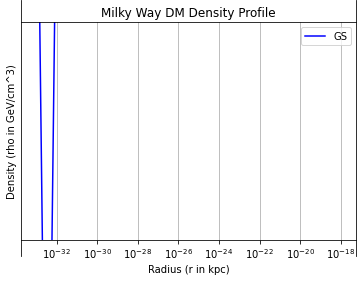

In [46]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt



# Define the function for r(ψ, l)
def r(zi, l):
    return np.sqrt(R0**2 - 2*l*R0*np.cos(zi) + l**2)

# Define the function for the maximum l
def l_max(zi):
    return np.sqrt(R**2 - R0**2 * np.sin(zi)**2) + R0 * np.cos(zi)

# Define the function to be integrated


# Define constants
R = 200  # kpc, halo's virial radius
R0 = 8.2 # provide the value of r here
m_chi = 10**3
t = 3.15 * 10**17 # in s
rhos = (rho0 * ((R0 / rs) * (1 + R0 / rs)**(2)))

# Define the limits for ψ and l
ψ_min = 0
ψ_max = np.pi / 2

# Calculate sigma_v values
sigma_v = np.logspace(-33, -18, 100) # provide the value of ρ here
rho_sat = []
R_sat = []
for i in range(len(sigma_v)):
    rh = m_chi/(sigma_v[i]*t)
    rho_sat.append(rh)

for i in range(len(sigma_v)):
    r_sat = (((rhos/rho_sat[i])*(rs/Rsp)*((1+(Rsp/rs))**(-2)))**(1/gamma_sp))*Rsp
    R_sat.append(r_sat)

J = []
for i in range(len(sigma_v)):
    j = dblquad(lambda zi, l: ((rho_sat[i]*(R_sat[i])**2.35)/r(zi, l)**2.35)**2, 0, np.pi / 2, lambda zi: 0, lambda zi: l_max(zi))

    J.append(j[0])  # Return only the result, ignoring the error estimate
    
# Calculate J factors
plt.plot(sigma_v, J,label='GS', color='b')
plt.xlabel('Radius (r in kpc)')
plt.ylabel('Density (rho in GeV/cm^3)')
plt.title('Milky Way DM Density Profile')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()